In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
data.fillna(data.mean(), inplace=True)

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [5]:
data['salary'] = data['salary'].fillna(data['salary'].mode()[0])

In [6]:
not_placed_count = data[data['status'] == 'Not Placed'].shape[0]

In [7]:
not_placed_count

67

In [8]:
non_placement_reasons = data[data['status'] == 'Not Placed']['status'].value_counts()


In [9]:
non_placement_reasons

Not Placed    67
Name: status, dtype: int64

In [10]:
salary_mba_correlation = data['salary'].corr(data['mba_p'])

In [11]:
salary_mba_correlation

0.1463244900603875

In [12]:
min_salary_specialization = data.groupby('specialisation')['salary'].mean().idxmin()


In [13]:
min_salary_specialization

'Mkt&HR'

In [14]:
above_500k_count = data[data['salary'] > 500000].shape[0]

In [15]:
above_500k_count

3

In [16]:
etest_mba_anova = f_oneway(data['etest_p'], data['mba_p'])

In [17]:
etest_mba_anova

F_onewayResult(statistic=100.49298790500407, pvalue=2.101472592739362e-21)

In [18]:
science_salary = data[data['degree_t'] == 'Sci&Tech']['salary']
marketing_hr_salary = data[data['specialisation'] == 'Mkt&HR']['salary']
degree_specialization_salary_test = ttest_ind(science_salary, marketing_hr_salary)

In [19]:
science_salary
marketing_hr_salary
degree_specialization_salary_test

Ttest_indResult(statistic=2.774724236760964, pvalue=0.006218437705806388)

In [20]:
data['salary_standardized'] = (data['salary'] - data['salary'].mean()) / data['salary'].std()

In [21]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_standardized
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,-0.241969
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,-1.149898
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,-0.501377
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,0.000000
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,1.768448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000,1.444187
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000,-0.177116
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000,0.082292
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000,-1.098017


In [22]:
pdf_700k_900k = norm.pdf(np.linspace(700000, 900000, 1000), data['salary'].mean(), data['salary'].std())

In [23]:
pdf_700k_900k 

array([3.40910885e-12, 3.36219298e-12, 3.31590041e-12, 3.27022317e-12,
       3.22515339e-12, 3.18068332e-12, 3.13680527e-12, 3.09351167e-12,
       3.05079502e-12, 3.00864794e-12, 2.96706312e-12, 2.92603335e-12,
       2.88555150e-12, 2.84561053e-12, 2.80620349e-12, 2.76732351e-12,
       2.72896381e-12, 2.69111770e-12, 2.65377855e-12, 2.61693984e-12,
       2.58059511e-12, 2.54473799e-12, 2.50936217e-12, 2.47446145e-12,
       2.44002969e-12, 2.40606081e-12, 2.37254883e-12, 2.33948784e-12,
       2.30687200e-12, 2.27469552e-12, 2.24295273e-12, 2.21163798e-12,
       2.18074573e-12, 2.15027048e-12, 2.12020682e-12, 2.09054939e-12,
       2.06129291e-12, 2.03243216e-12, 2.00396199e-12, 1.97587730e-12,
       1.94817307e-12, 1.92084434e-12, 1.89388620e-12, 1.86729381e-12,
       1.84106240e-12, 1.81518724e-12, 1.78966368e-12, 1.76448711e-12,
       1.73965299e-12, 1.71515683e-12, 1.69099420e-12, 1.66716072e-12,
       1.64365208e-12, 1.62046401e-12, 1.59759229e-12, 1.57503277e-12,
      

In [24]:
degree_etest_mba_test = ttest_ind(data[data['degree_t'] == 'Sci&Tech']['etest_p'], data['etest_p']), ttest_ind(data[data['degree_t'] == 'Sci&Tech']['mba_p'], data['mba_p'])

In [25]:
degree_etest_mba_test

(Ttest_indResult(statistic=0.10721935272228869, pvalue=0.9146934265800224),
 Ttest_indResult(statistic=1.3820881305385133, pvalue=0.16807029683073973))

In [26]:
correlation_with_salary = data.corr()['salary'].sort_values(ascending=False).index[1]

In [27]:
correlation_with_salary

'salary'

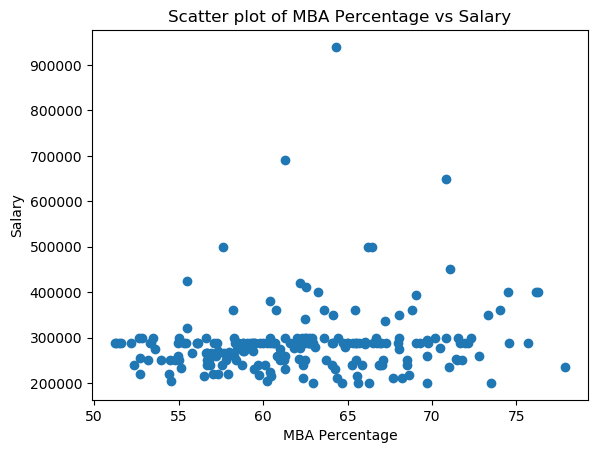

1) NaN values have been replaced with mean for numerical columns and mode for categorical columns.
2) Number of students not placed: 67
3) Reasons for non-placement: Not Placed    67
Name: status, dtype: int64
4) Correlation between salary and mba_p: 0.1463244900603875
5) Specialization getting minimum salary: Mkt&HR
6) Number of students getting above 500000 salary: 3
7) ANOVA between etest_p and mba_p: F_onewayResult(statistic=100.49298790500407, pvalue=2.101472592739362e-21)
8) Hypothesis testing between degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary: Ttest_indResult(statistic=2.774724236760964, pvalue=0.006218437705806388)
9) Salary column converted to standard normal distribution.
10) Probability Density Function of salary range from 700000 to 900000: [3.40910885e-12 3.36219298e-12 3.31590041e-12 3.27022317e-12
 3.22515339e-12 3.18068332e-12 3.13680527e-12 3.09351167e-12
 3.05079502e-12 3.00864794e-12 2.96706312e-12 2.92603335e-12
 2.88555150e-12 2.84561053e-

In [28]:
import matplotlib.pyplot as plt
plt.scatter(data['mba_p'], data['salary'])
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.title('Scatter plot of MBA Percentage vs Salary')
plt.show()

print("1) NaN values have been replaced with mean for numerical columns and mode for categorical columns.")
print("2) Number of students not placed:", not_placed_count)
print("3) Reasons for non-placement:", non_placement_reasons)
print("4) Correlation between salary and mba_p:", salary_mba_correlation)
print("5) Specialization getting minimum salary:", min_salary_specialization)
print("6) Number of students getting above 500000 salary:", above_500k_count)
print("7) ANOVA between etest_p and mba_p:", etest_mba_anova)
print("8) Hypothesis testing between degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary:", degree_specialization_salary_test)
print("9) Salary column converted to standard normal distribution.")
print("10) Probability Density Function of salary range from 700000 to 900000:", pdf_700k_900k)
print("11) Hypothesis testing between degree_t(Sci&Tech) and etest_p, mba_p:", degree_etest_mba_test)
print("12) Parameter highly correlated with salary:", correlation_with_salary)
print("13) Scatter plot between salary and mba_p shows the relationship between them.")